exp1:Device a program to import,load,and view a dataset.

In [1]:
# Import necessary libraries
import pandas as pd

# Load dataset (replace 'your_dataset.csv' with your file path)
data = pd.read_csv("dataset.csv")

# View first 5 rows
print("First 5 rows of the dataset:")
print(data.head())

# View dataset info
print("\nDataset Info:")
print(data.info())

# View column names
print("\nColumns in dataset:")
print(data.columns)

# Shape of dataset
print("\nShape of dataset (rows, columns):")
print(data.shape)


First 5 rows of the dataset:
   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  

Dataset Info:
<class 'panda

exp2:Create a program to display the summary and statistics of the dataset


In [2]:
import pandas as pd

# Load dataset (use your dataset file here)
data = pd.read_csv("dataset.csv")

# Display first few rows
print("🔹 First 5 Rows of Dataset:")
print(data.head())

# Summary statistics (numerical columns)
print("\n🔹 Summary Statistics:")
print(data.describe())

# Summary of dataset (data types, null values, etc.)
print("\n🔹 Dataset Info:")
print(data.info())

# Checking for missing values
print("\n🔹 Missing Values:")
print(data.isnull().sum())

# Correlation matrix
print("\n🔹 Correlation Matrix:")
print(data.corr())


🔹 First 5 Rows of Dataset:
   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  

🔹 Summary Statistics:
       

exp3:implement linear regression to perform prediction

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = pd.read_csv("dataset.csv")

# Features (all except 'target')
X = data.drop("target", axis=1)

# Target (the column we want to predict)
y = data["target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("🔹 Coefficients:", model.coef_)
print("🔹 Intercept:", model.intercept_)
print("🔹 Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("🔹 R² Score:", r2_score(y_test, y_pred))


🔹 Coefficients: [ 0.00330634  0.17346618  0.11886123  0.00035372 -0.00036514  0.11033585
  0.00770531 -0.00199111  0.17076555  0.04942173  0.18910056]
🔹 Intercept: -0.3061358464340457
🔹 Mean Squared Error: 0.12407545361079475
🔹 R² Score: 0.498599558084479


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


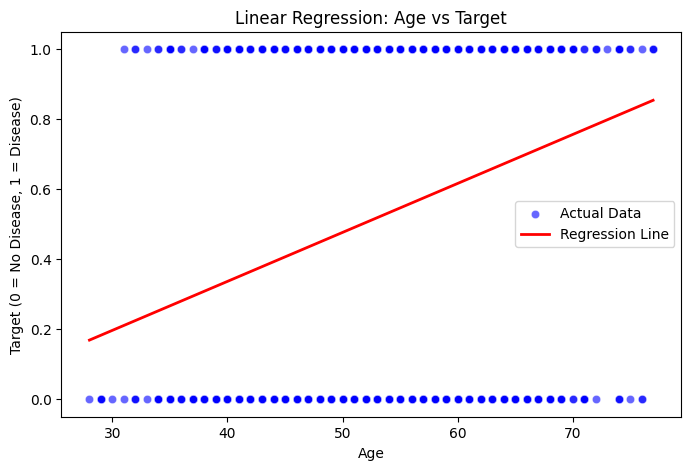

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

# Select one feature for visualization
X = data[["age"]]   # independent variable
y = data["target"]  # dependent variable

# Train regression on single feature
model = LinearRegression()
model.fit(X, y)

# Predictions (for line)
X_range = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
y_pred_line = model.predict(X_range)

# Scatter plot of actual data
plt.figure(figsize=(8,5))
sns.scatterplot(x=X["age"], y=y, alpha=0.6, color="blue", label="Actual Data")

# Regression line
plt.plot(X_range, y_pred_line, color="red", linewidth=2, label="Regression Line")

# Labels
plt.xlabel("Age")
plt.ylabel("Target (0 = No Disease, 1 = Disease)")
plt.title("Linear Regression: Age vs Target")
plt.legend()
plt.show()


Experiment 4: Implement Bayesian Logistic Regression and SVM on your dataset.

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Features and Target
X = data.drop("target", axis=1)
y = data["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression (Bayesian style with regularization)
log_model = LogisticRegression(max_iter=1000, solver="lbfgs")
log_model.fit(X_train, y_train)

# Predictions
y_pred = log_model.predict(X_test)

# Evaluation
print("🔹 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


🔹 Logistic Regression Accuracy: 0.8613445378151261

Confusion Matrix:
 [[ 90  17]
 [ 16 115]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85       107
           1       0.87      0.88      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.86      0.86       238
weighted avg       0.86      0.86      0.86       238



In [9]:
from sklearn.svm import SVC

# SVM Model (with RBF kernel)
svm_model = SVC(kernel="rbf", C=1.0, gamma="scale")
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluation
print("🔹 SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))


🔹 SVM Accuracy: 0.726890756302521

Confusion Matrix:
 [[81 26]
 [39 92]]

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.76      0.71       107
           1       0.78      0.70      0.74       131

    accuracy                           0.73       238
   macro avg       0.73      0.73      0.73       238
weighted avg       0.73      0.73      0.73       238



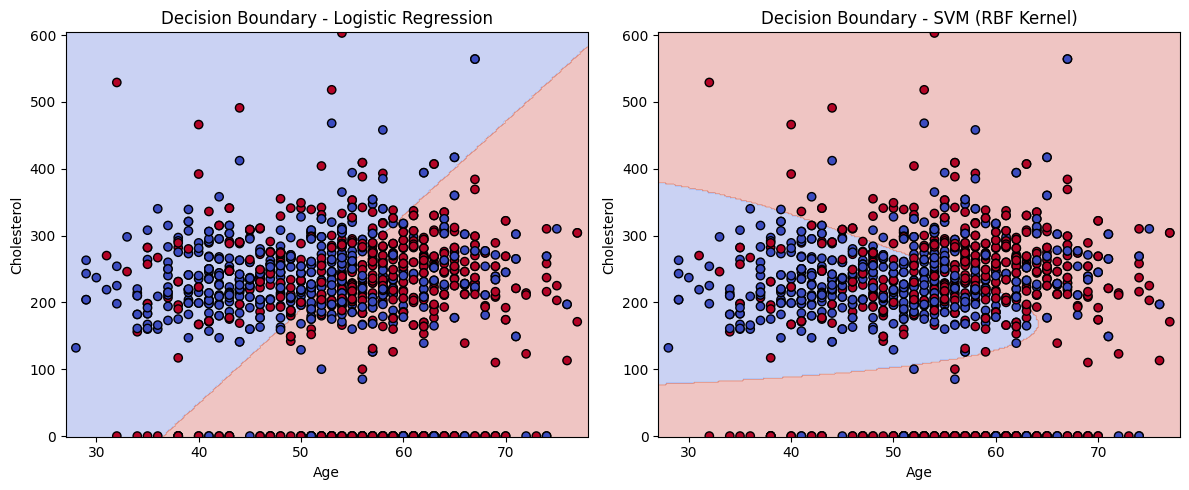

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Select two features
X = data[["age", "cholesterol"]].values
y = data["target"].values

# Train Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X, y)

# Train SVM
svm_model = SVC(kernel="rbf", probability=True)
svm_model.fit(X, y)

# Create mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predict for each point in the grid
Z_log = log_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z_log = Z_log.reshape(xx.shape)

Z_svm = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z_svm = Z_svm.reshape(xx.shape)

# Plot Logistic Regression boundary
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.contourf(xx, yy, Z_log, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.title("Decision Boundary - Logistic Regression")

# Plot SVM boundary
plt.subplot(1,2,2)
plt.contourf(xx, yy, Z_svm, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.title("Decision Boundary - SVM (RBF Kernel)")

plt.tight_layout()
plt.show()
